## Task 1: Exploratory Data Analysis (EDA) and Business Insight

Importing Required Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# For better visualizations
sns.set_theme(style="whitegrid")

Load the Datasets

In [40]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

Preview the data

In [41]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [42]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [43]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Basic Exploration

Checking structure of each dataset

In [44]:
print(customers.info(), end="\n\n------------------- \n\n")
print(products.info(), end="\n\n------------------- \n\n")
print(transactions.info(),end="\n\n------------------- \n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count

Checking for missing values

In [45]:
print(customers.isnull().sum(), end="\n\n ------------------- \n\n")
print(products.isnull().sum(), end="\n\n ------------------- \n\n")
print(transactions.isnull().sum(), end="\n\n ------------------- \n\n")

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

 ------------------- 

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

 ------------------- 

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

 ------------------- 



Checking for duplicates


In [46]:
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


In [47]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

## Exploratory Data Analysis

* Distribution of customers by region

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


C:\Users\sarika kushwaha\AppData\Local\Temp\ipykernel_8928\893336246.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x="Region", palette="summer", order=customers['Region'].value_counts().index)


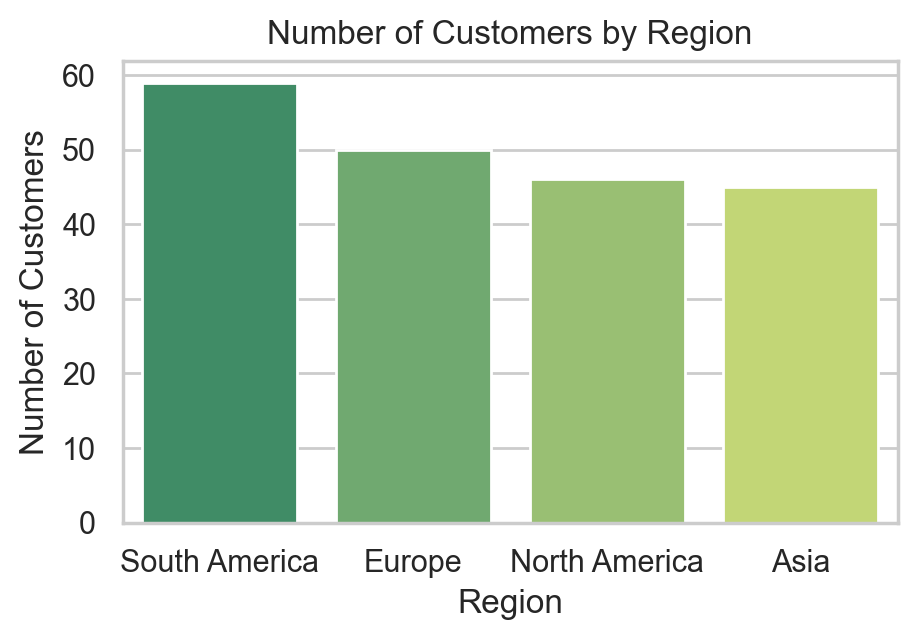

In [117]:
print(customers['Region'].value_counts())

plt.figure(figsize=(5,3), dpi=200)
sns.countplot(data=customers, x="Region", palette="summer", order=customers['Region'].value_counts().index)
plt.title("Number of Customers by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.show()

Signup trends over time

SignupYear
2022    64
2023    57
2024    79
Name: count, dtype: int64


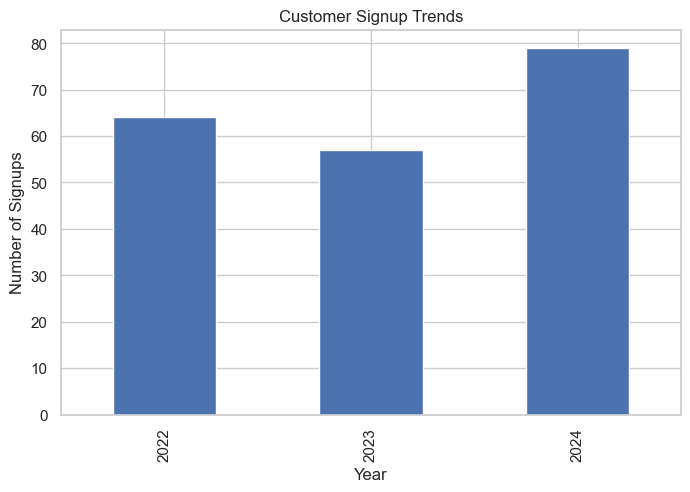

In [100]:
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()

print(signup_trends)

plt.figure(figsize=(8, 5))
signup_trends.plot(kind='bar')
plt.title("Customer Signup Trends")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

Top products by category

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


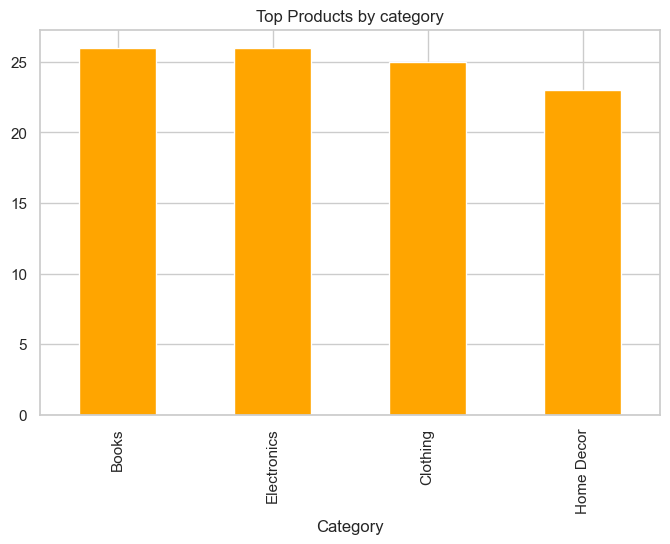

In [99]:

top_products = products['Category'].value_counts()

print(top_products)

plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='orange')
plt.title("Top Products by category")
plt.show()


top revenue-generating products

  ProductID  TotalValue               ProductName
0      P029    19513.80        TechPro Headphones
1      P079    17946.91            ActiveWear Rug
2      P048    17905.20          TechPro Cookbook
3      P020    15060.92         ActiveWear Jacket
4      P062    14592.24           HomeSense Novel
5      P059    13947.20           SoundWave Jeans
6      P039    13778.88        TechPro Smartwatch
7      P083    13671.60     ActiveWear Smartwatch
8      P019    13487.95     ComfortLiving Sweater
9      P041    13232.12  ComfortLiving Smartphone


C:\Users\sarika kushwaha\AppData\Local\Temp\ipykernel_8928\3561926550.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_revenue_products, x='ProductName', y='TotalValue', palette='viridis')


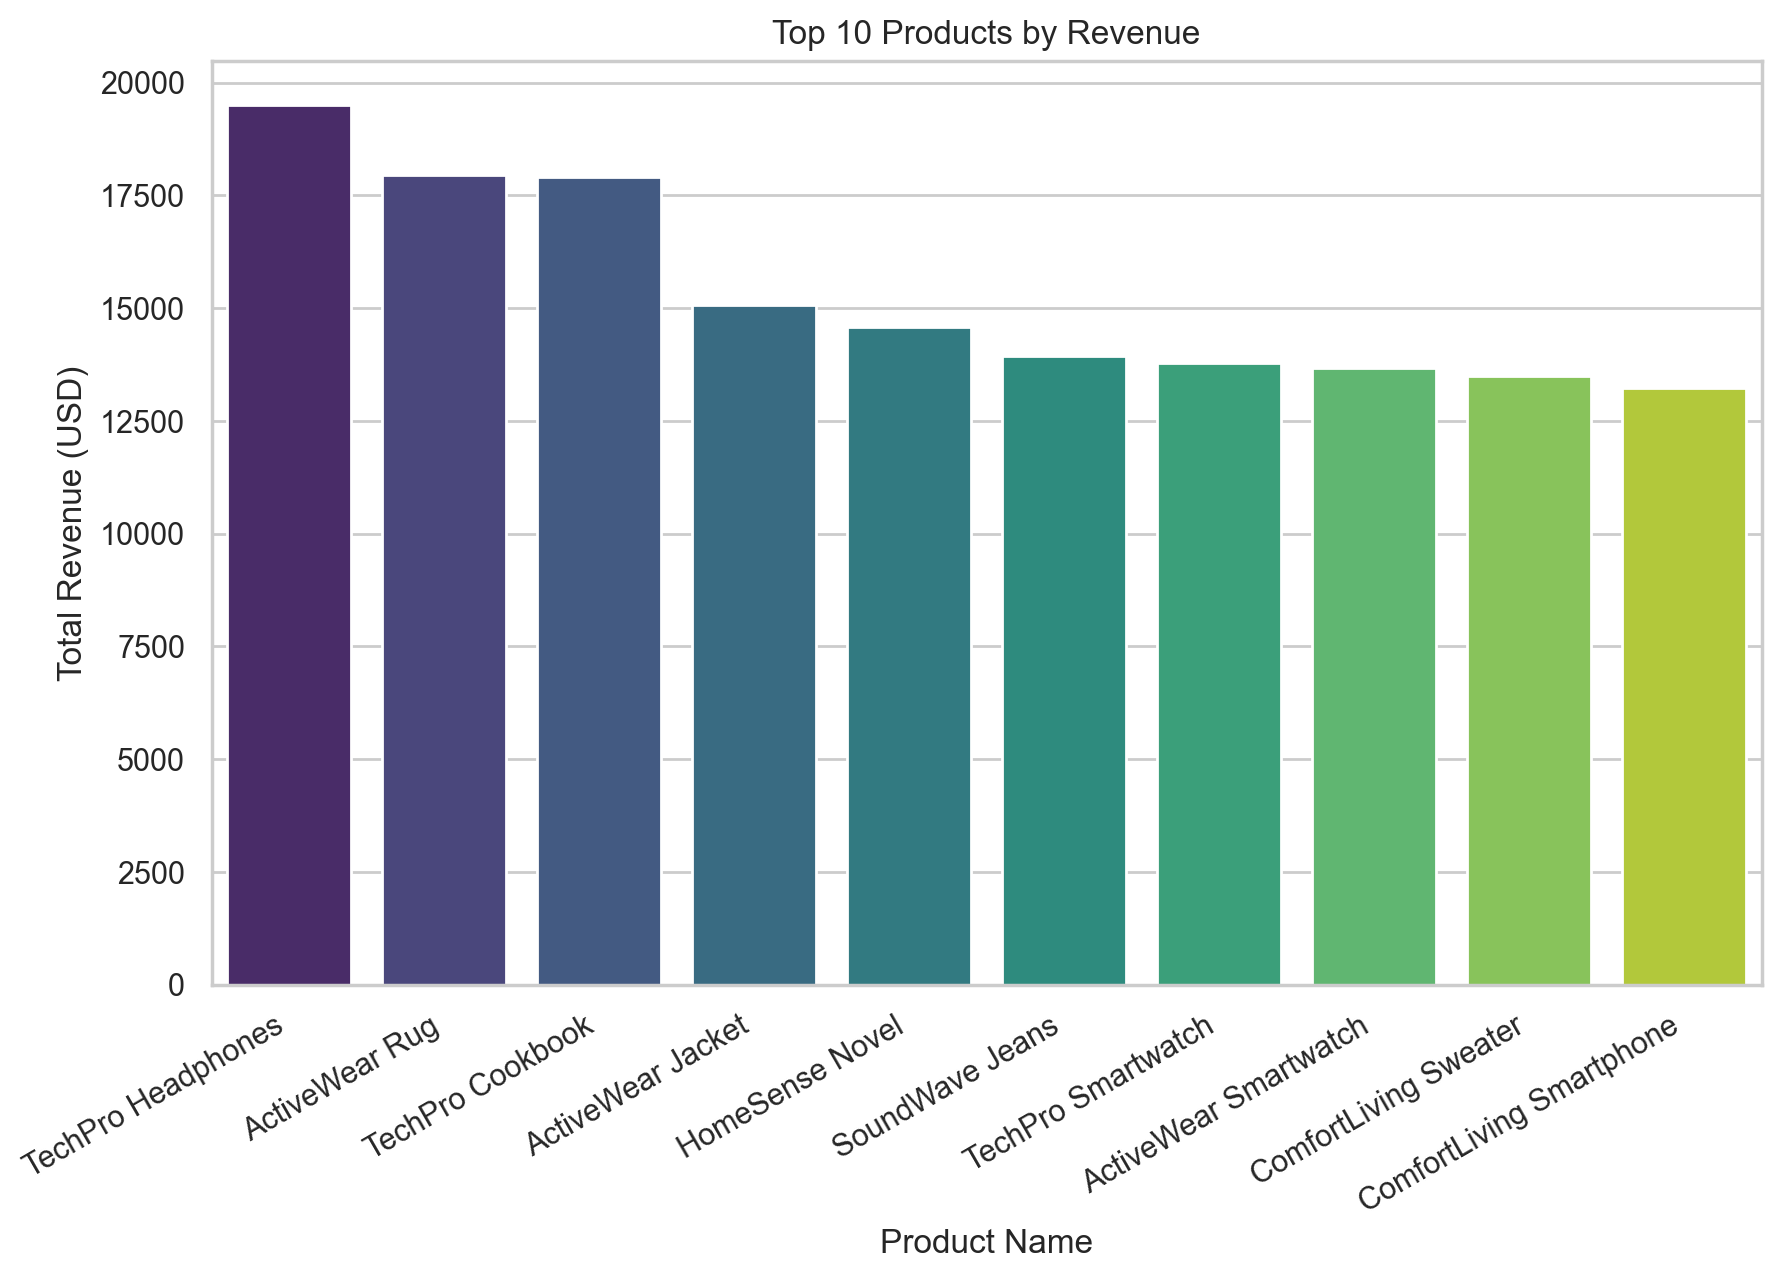

In [91]:
top_10_revenue_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_revenue_products = top_10_revenue_products.merge(products[['ProductID', 'ProductName']], on='ProductID')

print(top_10_revenue_products)

plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(data=top_10_revenue_products, x='ProductName', y='TotalValue', palette='viridis')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=30, ha='right')
plt.show()

top 10 low-performing products

C:\Users\sarika kushwaha\AppData\Local\Temp\ipykernel_8928\1876532438.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low_performing_products.head(10), x='ProductName', y='TotalValue', palette='summer')


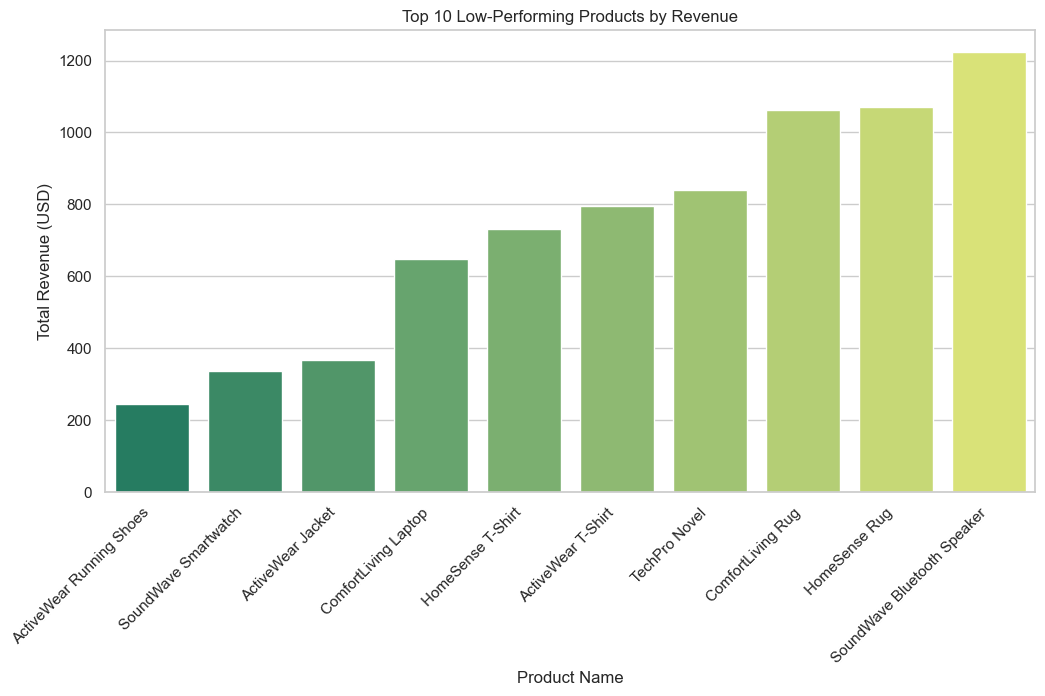

low performing products


,ProductID,TotalValue,ProductName
43,P044,244.66,ActiveWear Running Shoes
55,P056,337.68,SoundWave Smartwatch
13,P014,367.64,ActiveWear Jacket
72,P073,647.76,ComfortLiving Laptop
69,P070,730.35,HomeSense T-Shirt
...,...,...,...
61,P062,14592.24,HomeSense Novel
19,P020,15060.92,ActiveWear Jacket
47,P048,17905.20,TechPro Cookbook
78,P079,17946.91,ActiveWear Rug


In [125]:
low_performing_products = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
low_performing_products = low_performing_products.merge(products[['ProductID', 'ProductName']], on='ProductID')
low_performing_products = low_performing_products.sort_values(by='TotalValue', ascending=True)



plt.figure(figsize=(12, 6))
sns.barplot(data=low_performing_products.head(10), x='ProductName', y='TotalValue', palette='summer')
plt.title("Top 10 Low-Performing Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45, ha='right')
plt.show()
print("low performing products")
low_performing_products

Distribution of product prices

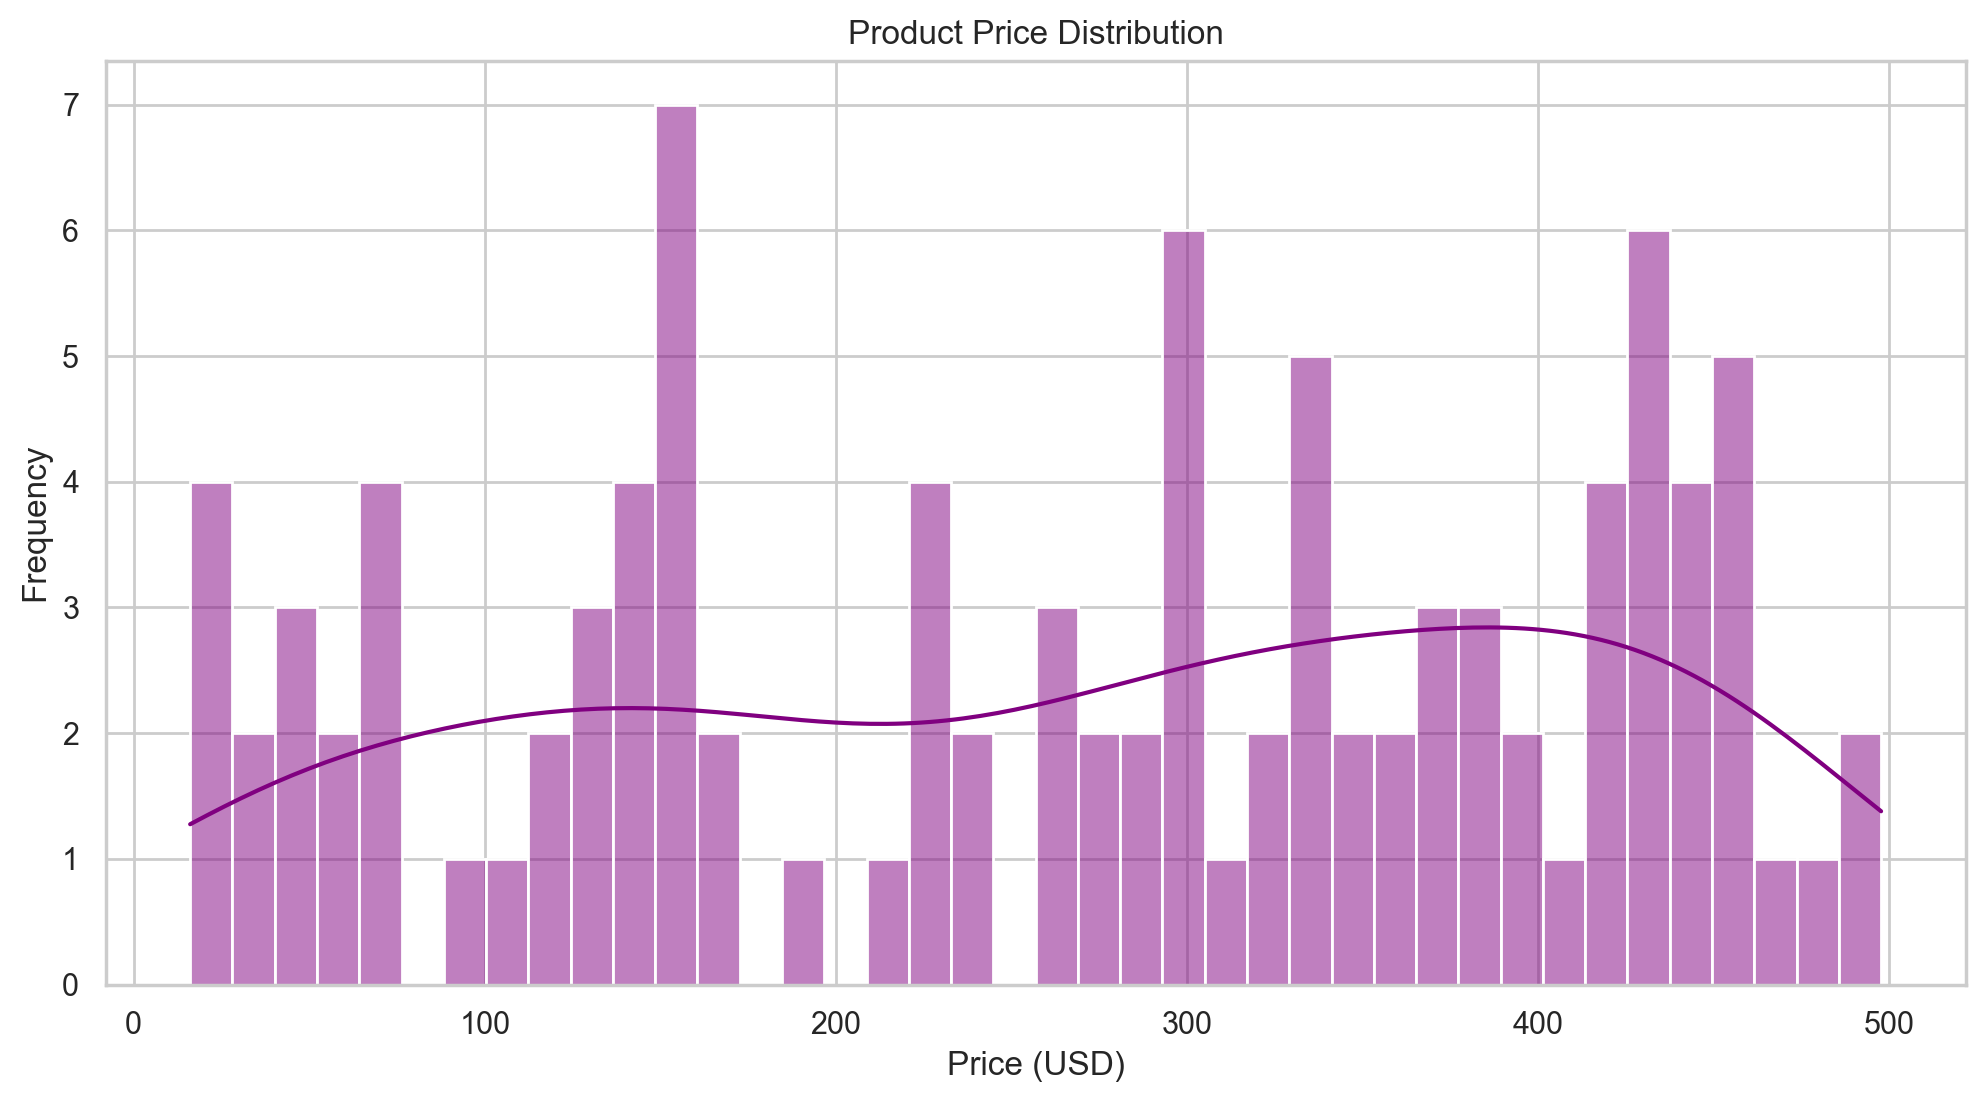

In [110]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(products['Price'], bins=40,kde= True, color='purple')
plt.title("Product Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()


Monthly transaction trends

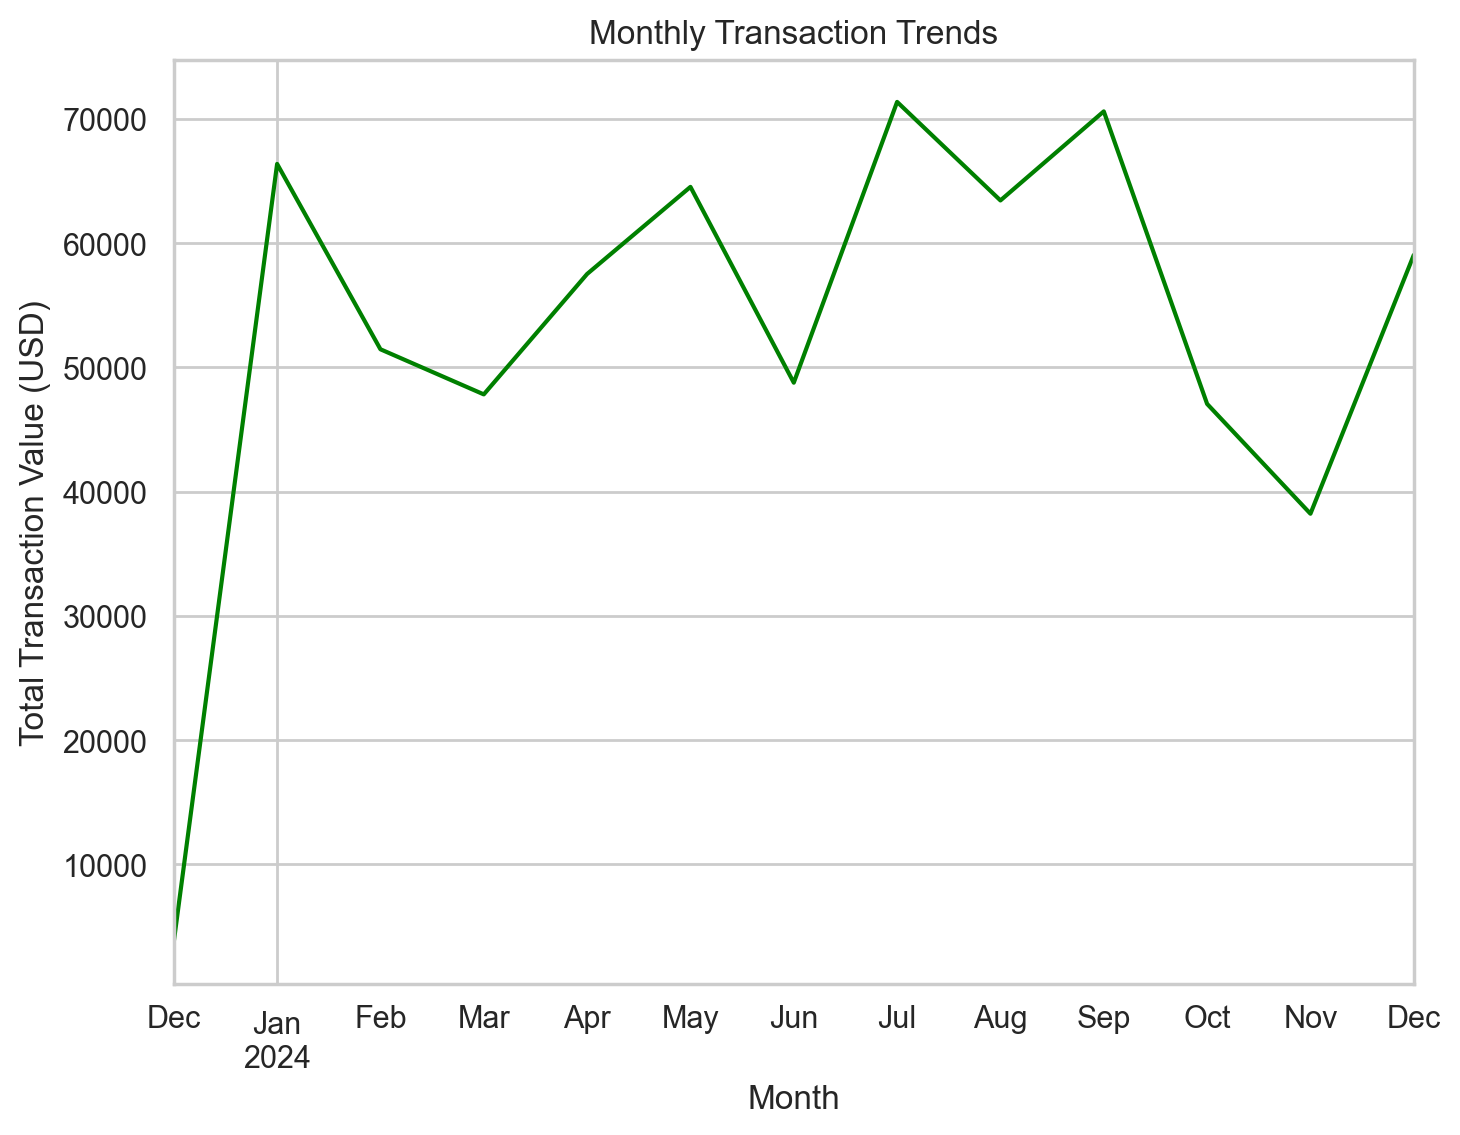

In [112]:
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_trends = transactions.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(8, 6), dpi=200)
monthly_trends.plot(color='green')
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Total Transaction Value (USD)")
plt.show()

Top customers by transaction value

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


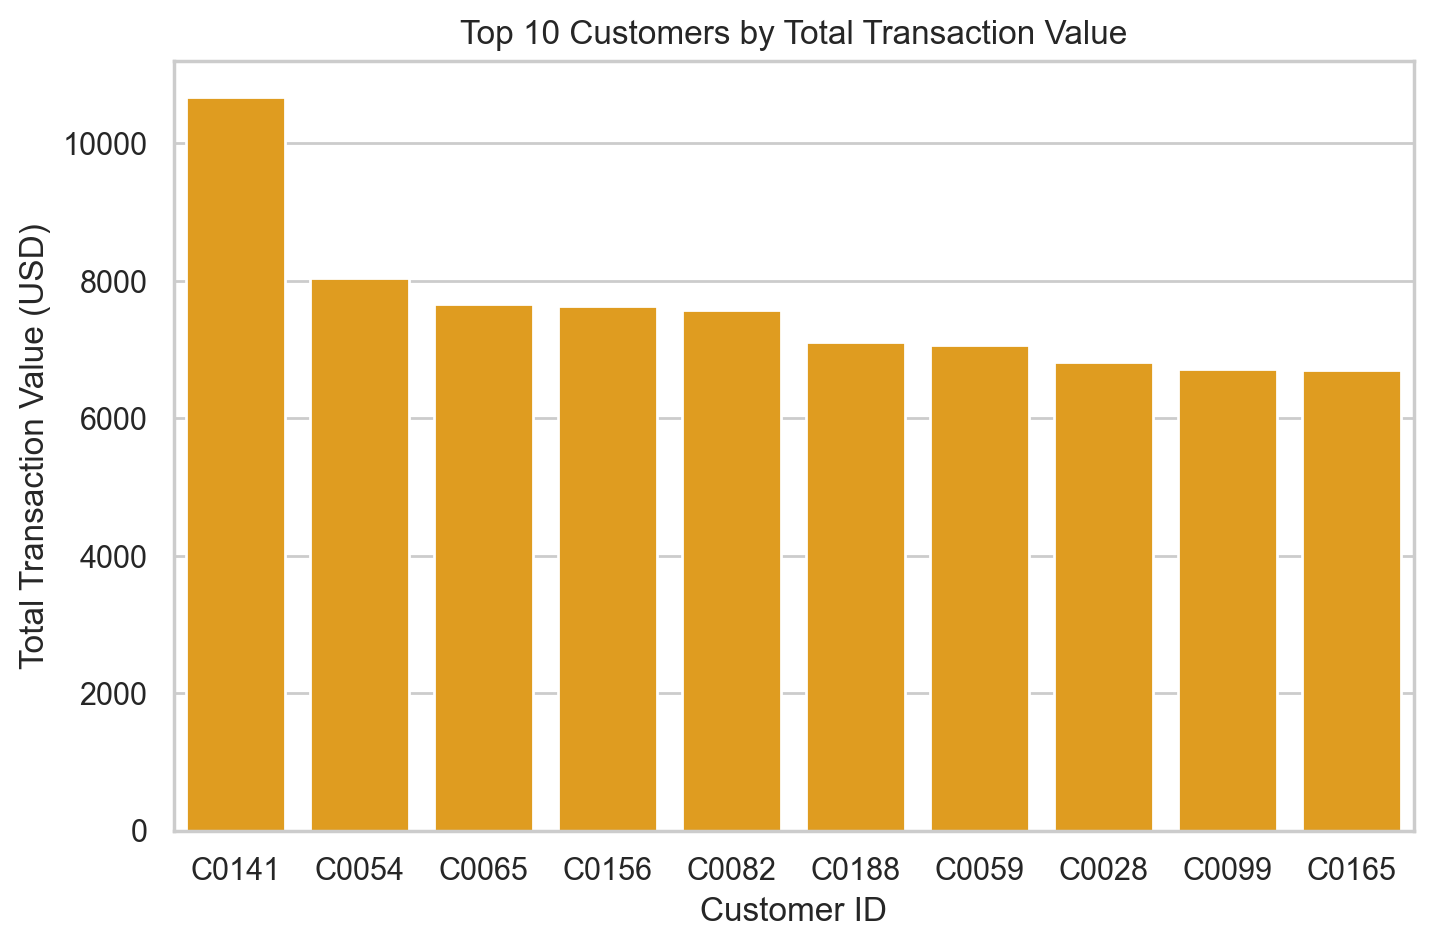

In [121]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

print(top_customers)
plt.figure(figsize=(8, 5),dpi=200)
sns.barplot(x=top_customers.index, y=top_customers.values, color='orange')
plt.title("Top 10 Customers by Total Transaction Value")
plt.xlabel("Customer ID")
plt.ylabel("Total Transaction Value (USD)")
plt.show()

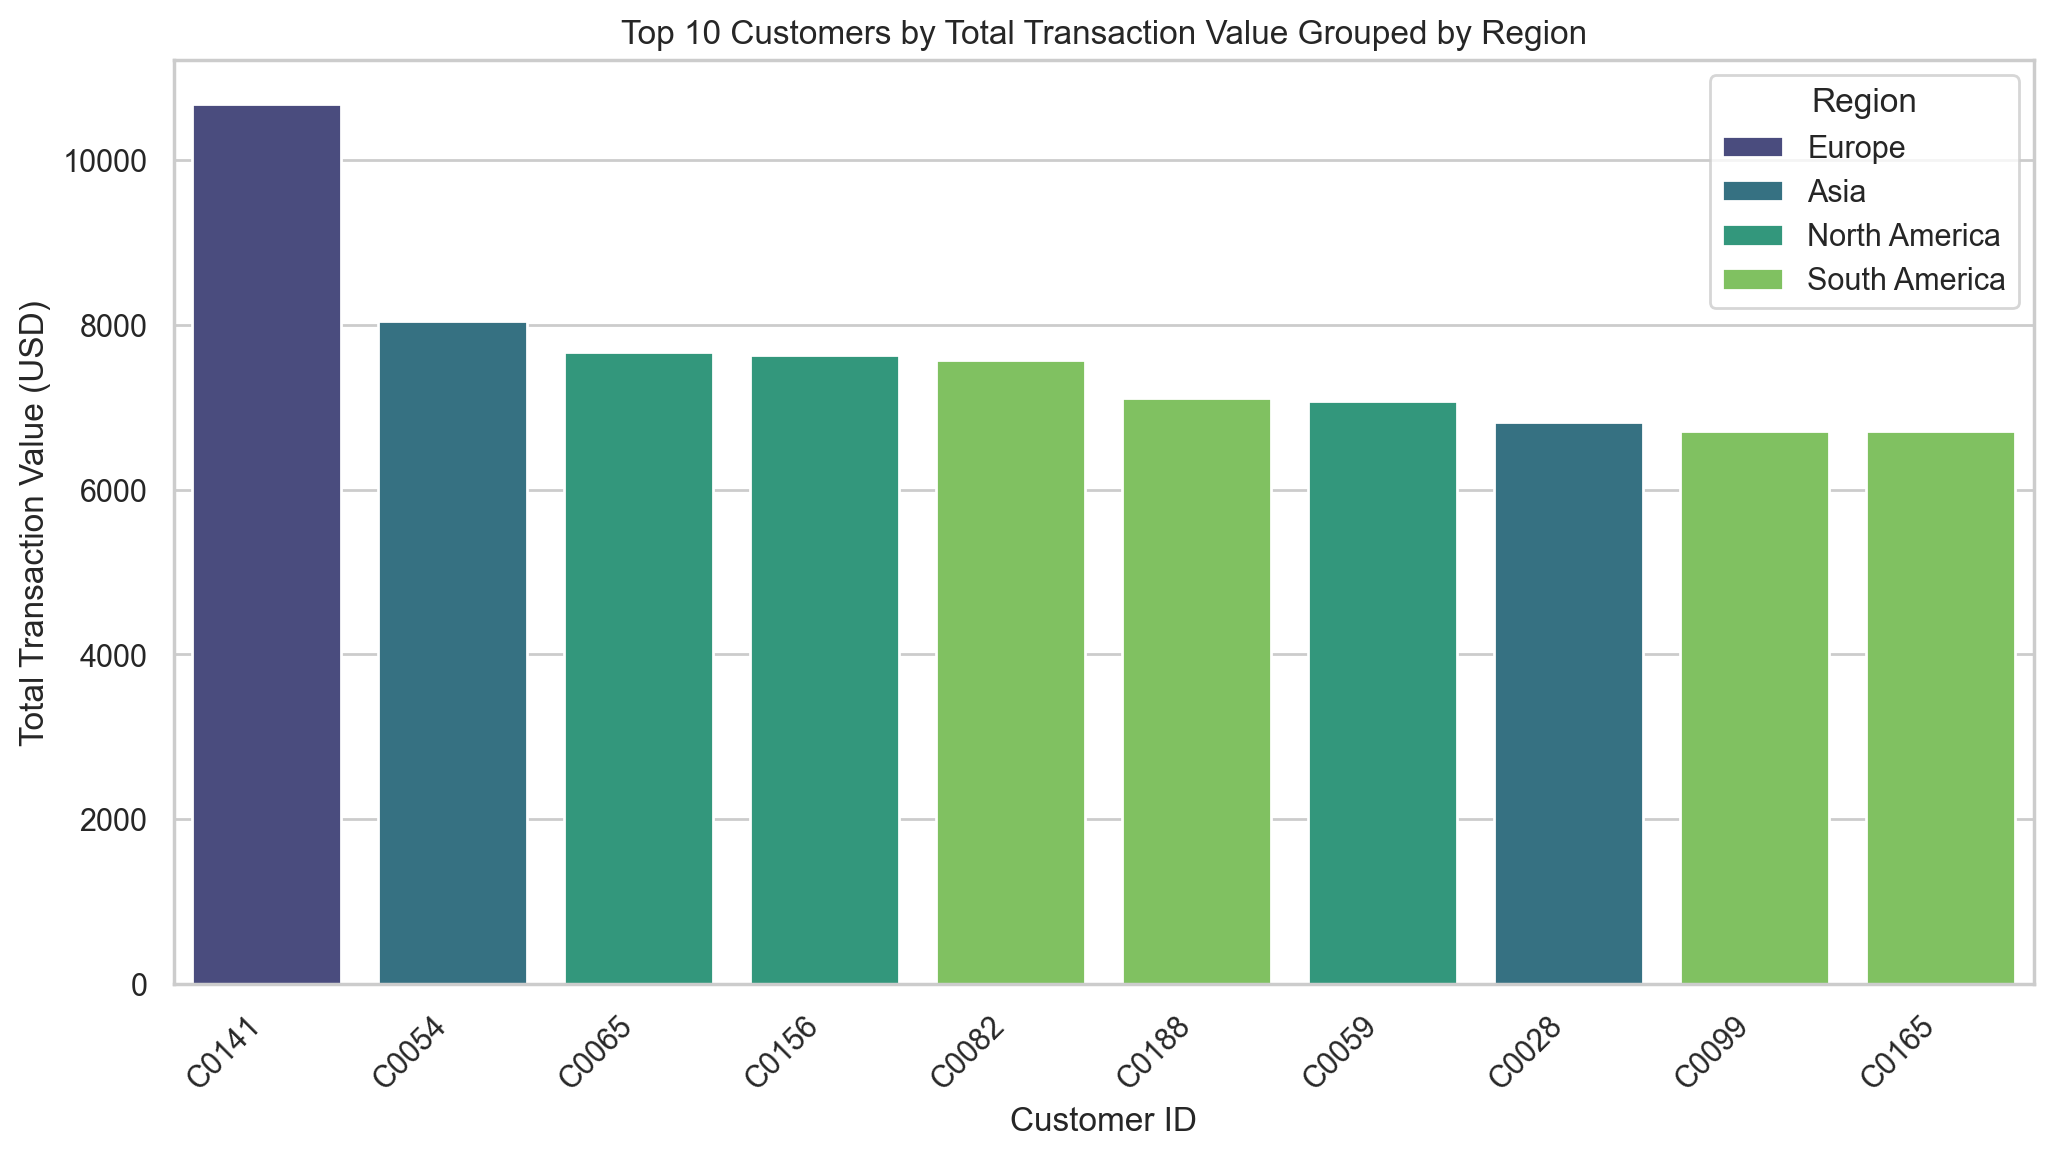

In [37]:
# Merging transactions with customers to get the region information
transactions_with_region = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID')

# Grouping by CustomerID and Region to get the total transaction value for each customer in each region
top_customers_by_region = transactions_with_region.groupby(['CustomerID', 'Region'])['TotalValue'].sum().reset_index()

#top 10 customers by total transaction value grouped by region
top_customers_by_region = top_customers_by_region.sort_values(by='TotalValue', ascending=False).head(10)

plt.figure(figsize=(12, 6), dpi=200)
sns.barplot(data=top_customers_by_region, x='CustomerID', y='TotalValue', hue='Region', palette='viridis')
plt.title("Top 10 Customers by Total Transaction Value Grouped by Region")
plt.xlabel("Customer ID")
plt.ylabel("Total Transaction Value (USD)")
plt.xticks(rotation=45, ha='right')
plt.show()

top revenue-generating products

C:\Users\sarika kushwaha\AppData\Local\Temp\ipykernel_8928\3829702201.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_revenue_products, x='ProductName', y='TotalValue', palette='viridis')


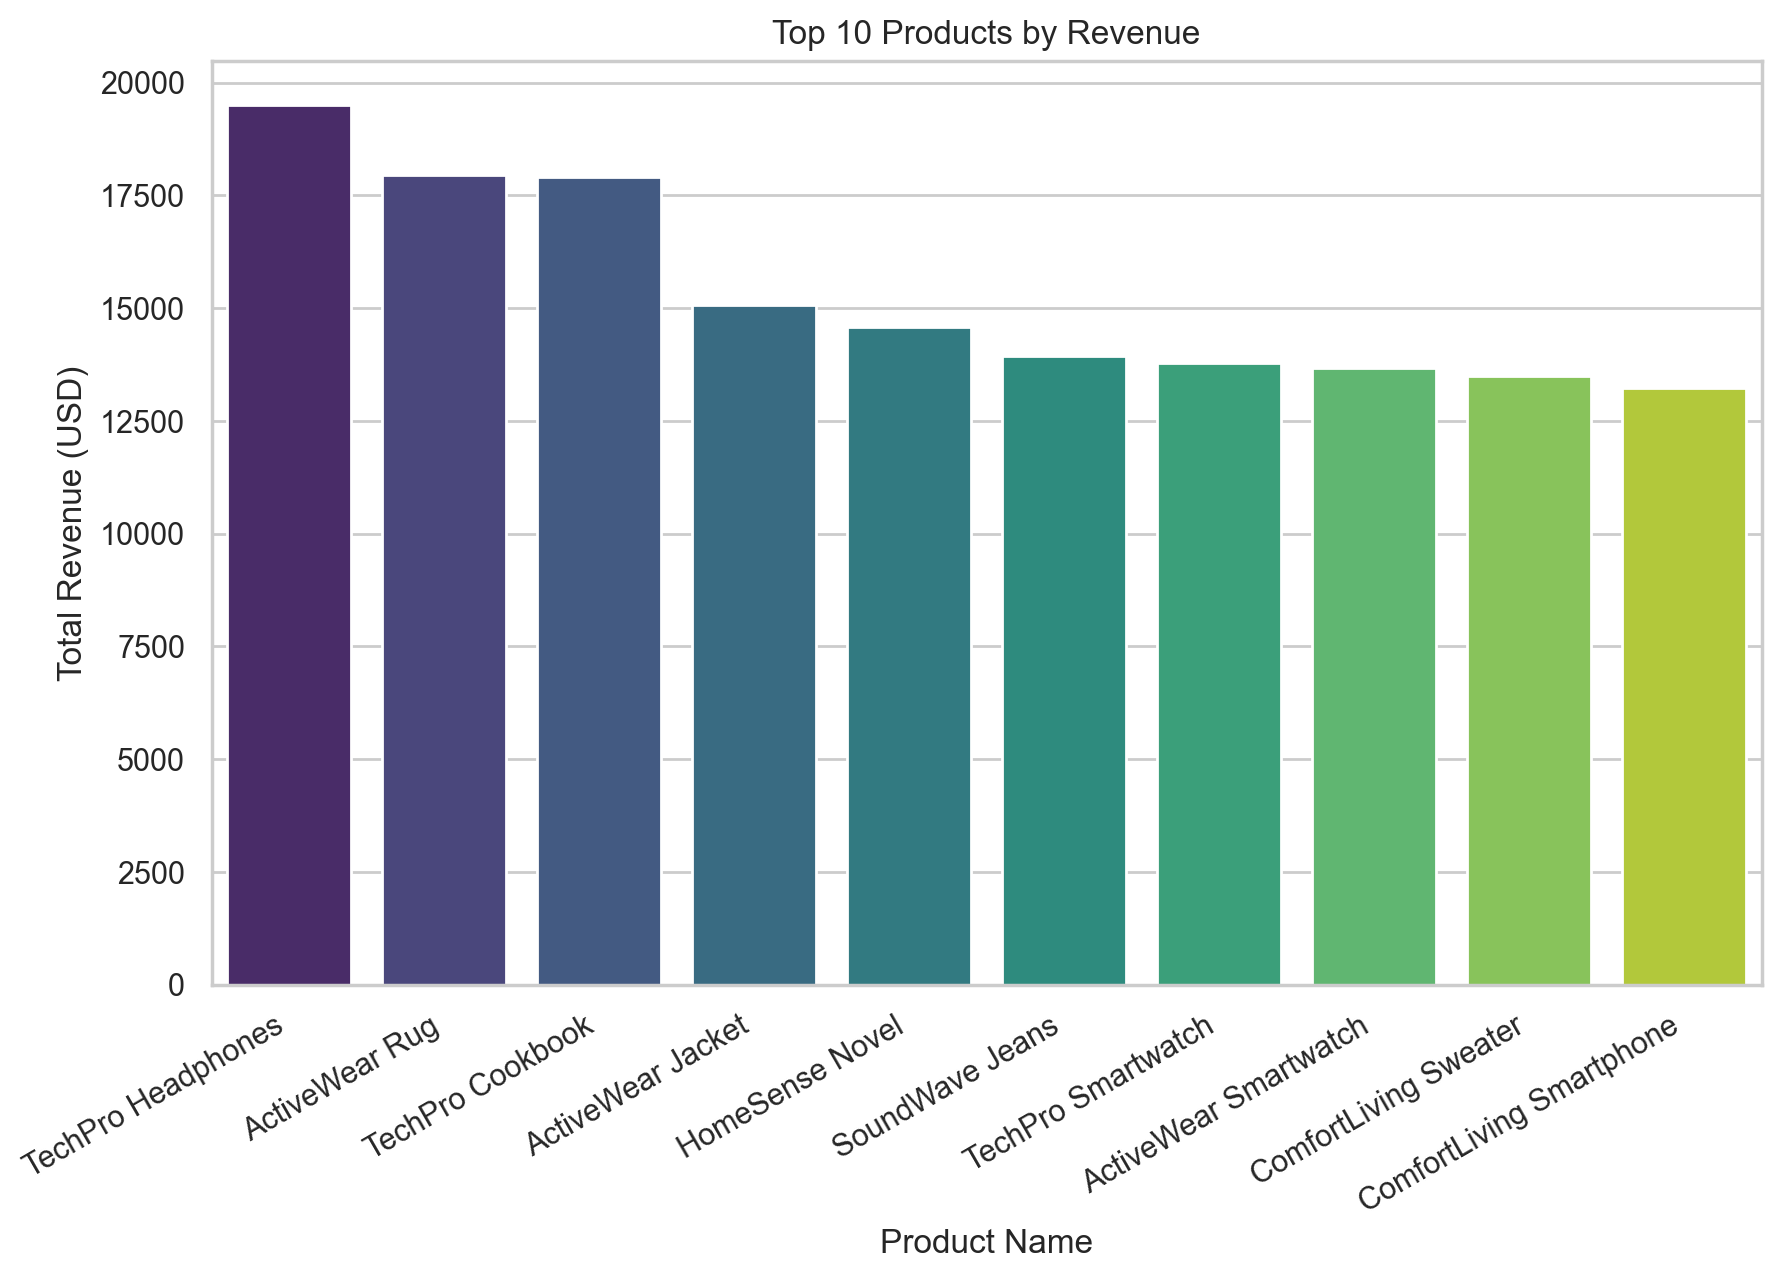

In [16]:
top_10_revenue_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_revenue_products = top_10_revenue_products.merge(products[['ProductID', 'ProductName']], on='ProductID')

plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(data=top_10_revenue_products, x='ProductName', y='TotalValue', palette='viridis')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=30, ha='right')
plt.show()

In [118]:
# customers those who are not in transactions
non_customers = customers[~customers['CustomerID'].isin(transactions['CustomerID'])]    
non_customers

,CustomerID,CustomerName,Region,SignupDate,SignupYear
179,C0180,Amy Carpenter,Asia,2023-10-25,2023


Inventory Turnover Rates

C:\Users\sarika kushwaha\AppData\Local\Temp\ipykernel_8928\1928442771.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=inventory_turnover.head(10), x='ProductName', y='TurnoverRate', palette='summer')


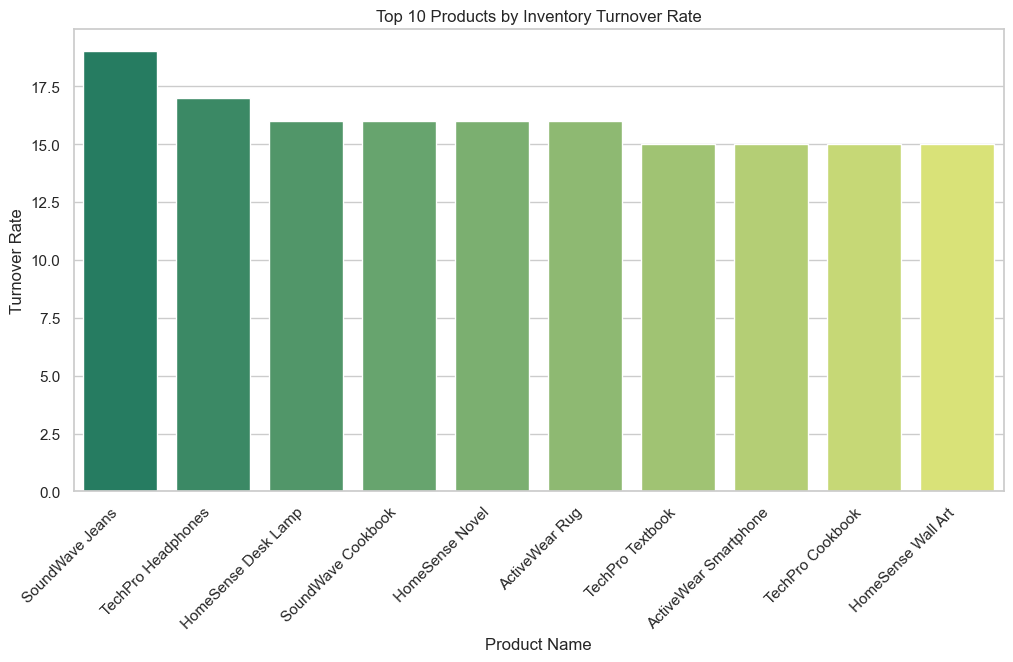

,ProductID,TurnoverRate,ProductName
58,P059,19,SoundWave Jeans
28,P029,17,TechPro Headphones
60,P061,16,HomeSense Desk Lamp
53,P054,16,SoundWave Cookbook
61,P062,16,HomeSense Novel
78,P079,16,ActiveWear Rug
48,P049,15,TechPro Textbook
56,P057,15,ActiveWear Smartphone
47,P048,15,TechPro Cookbook
21,P022,15,HomeSense Wall Art


In [119]:
inventory_turnover = transactions.groupby('ProductID')['TransactionID'].count().reset_index()
inventory_turnover.columns = ['ProductID', 'TurnoverRate']


inventory_turnover = inventory_turnover.merge(products[['ProductID', 'ProductName']], on='ProductID')
inventory_turnover = inventory_turnover.sort_values(by='TurnoverRate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=inventory_turnover.head(10), x='ProductName', y='TurnoverRate', palette='summer')
plt.title("Top 10 Products by Inventory Turnover Rate")
plt.xlabel("Product Name")
plt.ylabel("Turnover Rate")
plt.xticks(rotation=45, ha='right')
plt.show()
inventory_turnover.head(10)